Project Name: Food (Number 2) 
<br>

Dataset Num: 21

<br>
Team Members: Erifeoluwa Jamgbadi and Yazdani Mehrazin


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

<br>

<font size="5"> **Importing and Sorting out data for exploration/analyses**</font>

<br>

In [2]:
##reading in the dataset
data = pd.read_csv('dataset/en.openfoodfacts.org.products.tsv',sep='\t', dtype='unicode')

In [3]:
data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000024600,http://world-en.openfoodfacts.org/product/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000027205,http://world-en.openfoodfacts.org/product/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000036252,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1422221855,2015-01-25T21:37:35Z,Lion Peanut x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000039259,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1422221926,2015-01-25T21:38:46Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000039529,http://world-en.openfoodfacts.org/product/0000...,teolemon,1420147051,2015-01-01T21:17:31Z,1439141740,2015-08-09T17:35:40Z,Pack de 2 Twix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78241,9908278636246,http://world-en.openfoodfacts.org/product/9908...,andre,1360585770,2013-02-11T12:29:30Z,1389960647,2014-01-17T12:10:47Z,Szprot w oleju roslinnym,Sprot,170g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78242,99111250,http://world-en.openfoodfacts.org/product/9911...,balooval,1367163039,2013-04-28T15:30:39Z,1371690556,2013-06-20T01:09:16Z,Thé vert Earl grey,thé bio équitable,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
78243,9918,http://world-en.openfoodfacts.org/product/9918...,woshilapin,1430167954,2015-04-27T20:52:34Z,1430167992,2015-04-27T20:53:12Z,"Cheese cake thé vert, yuzu",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78244,9935010000003,http://world-en.openfoodfacts.org/product/9935...,sebleouf,1446293229,2015-10-31T12:07:09Z,1446376839,2015-11-01T11:20:39Z,Rillette d'oie,NaN,180 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# ###don't think all the data is needed, so reducing some
# reduceData = pd.DataFrame()
# #reduceData['creator'] =data['creator']
# reduceData[['product_name','code','creator', 'brands']] = data[['product_name','code','creator', 'brands']]
# reduceData
# #+ data['product_name'] + data['code'] + data['brands'] + data['cities'] + data['countries'] + data['origins']

<br>

<font size="5"> **1. Data Exploration and Analysis, pre-processing**</font>

<br>

In [5]:
# describing columns
data.describe()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,78228,78228,78177,78243,78239,78246,78246,70338,38117,65478,...,39,17,35,1210,123,610,0,194,36629,36629
unique,78228,78228,2323,77971,77972,76700,76700,58649,27038,9731,...,25,11,20,262,6,73,0,146,49,48
top,0000000024600,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1415014731,2014-11-03T11:38:51Z,1439141756,2015-08-09T17:35:56Z,OBF,Pâtes alimentaires au blé dur de qualité supér...,500 g,...,0.032,0.035,7.2,50,15,30,NaN,0,0,0
freq,1,1,21453,6,6,52,52,53,206,2838,...,6,5,8,224,66,109,NaN,14,2081,2521


In [6]:
len(data)

78246

In [7]:
data.isna().sum().sort_values()
# we can see that many columns have most or all the values at None

last_modified_t                              0
last_modified_datetime                       0
created_t                                    3
created_datetime                             7
code                                        18
                                         ...  
no_nutriments                            78246
ingredients_that_may_be_from_palm_oil    78246
mead-acid_100g                           78246
butyric-acid_100g                        78246
montanic-acid_100g                       78246
Length: 159, dtype: int64

In [8]:
features = ["creator" ,"countries_en", "image_url", "brands", "main_category_en","packaging"]
nutri_features = ["fat_100g", "energy_100g", "carbohydrates_100g", "proteins_100g", "salt_100g", "sugars_100g", "saturated-fat_100g"]
df = data[features + nutri_features]
df
# We manually select the important features for this assignment taking in consideration the number of None values.

,creator,countries_en,image_url,brands,main_category_en,packaging,fat_100g,energy_100g,carbohydrates_100g,proteins_100g,salt_100g,sugars_100g,saturated-fat_100g
0,date-limite-app,France,http://en.openfoodfacts.org/images/products/00...,NaN,fr:Filet-de-boeuf,plastique,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tacinte,France,http://en.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tacinte,France,http://en.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tacinte,France,http://en.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,teolemon,France,http://en.openfoodfacts.org/images/products/00...,Twix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78241,andre,Poland,http://en.openfoodfacts.org/images/products/99...,EvraFish,pl:Szprot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78242,balooval,France,http://en.openfoodfacts.org/images/products/99...,Lobodis,Beverages,"boîte,carton",0.2,21,0.5,0.5,0.0254,0.5,0.2
78243,woshilapin,France,http://en.openfoodfacts.org/images/products/99...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78244,sebleouf,France,http://en.openfoodfacts.org/images/products/99...,"Sans marque,D.Lambert",Meats,"Pot,Verre",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df["brands"] = df["brands"].fillna("None")
df["main_category_en"] = df["main_category_en"].fillna("None")
df["packaging"] = df["packaging"].fillna("None")
df["creator"] = df["creator"].fillna("None")
df["countries_en"] = df["countries_en"].fillna("None")
df["has_image"] = df["image_url"].isna()
del df["image_url"]
# Fill with a "None" string for EDA and add has_image field

In [10]:
df = df.dropna()
# For this assignment we decided to drop the rows without nutritional data, since they are critical for the clustering part and cannot be filled using interpolation or similar tecniques

In [11]:
for i in nutri_features:
    df[i] = pd.to_numeric(df[i])

In [12]:
df

,creator,countries_en,brands,main_category_en,packaging,fat_100g,energy_100g,carbohydrates_100g,proteins_100g,salt_100g,sugars_100g,saturated-fat_100g,has_image
10,tacinte,United Kingdom,"Asda,Asda Extra Special",Desserts,"plastic,bowl",7.0,1284.0,54.2,3.9,0.200000,44.0,3.6,False
11,tacinte,United Kingdom,"Asda,Asda Extra Special",Sugary snacks,"plastic,bowl",7.0,1284.0,54.2,3.9,0.199898,44.0,3.6,False
13,andre,France,Pepsi,Beverages,Canette aluminium,0.0,177.0,10.4,0.0,0.025400,10.4,0.0,False
16,tacite,France,"7Up,Pepsico",Beverages,Canette,0.0,177.0,10.4,0.0,0.100000,10.4,0.0,False
24,malikele,Germany,Candy Crush,Sugary snacks,None,0.0,1360.0,75.0,5.0,0.127000,57.5,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78207,kyzh,United Kingdom,princes,Tuna-chunks,canned,0.5,444.0,0.0,25.0,0.762000,0.0,0.0,False
78209,tacinte,United Kingdom,Newman's Own,Groceries,"Glass,Bottle",53.3,2111.0,6.4,1.7,1.750060,5.3,3.8,False
78210,tacinte,United Kingdom,Newman's Own,Groceries,"Glass,Bottle",6.9,660.0,23.1,0.3,0.541020,16.7,0.5,False
78235,drmalabar,France,Le Pain des fleurs,Plant-based foods and beverages,"Boîte,Carton,Sachet,Plastique",2.8,1643.0,74.8,13.0,0.680000,2.6,0.6,False


Text(0, 0.5, 'Count')

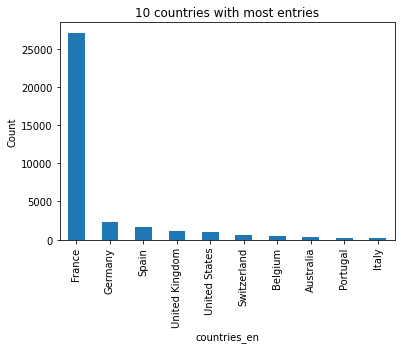

In [27]:
#EDA
top_countries = df.groupby("countries_en").size().sort_values(ascending=False).head(10).index
df.groupby("countries_en").size().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("10 countries with most entries")
plt.ylabel("Count")

In [28]:
top_countries

Index(['France', 'Germany', 'Spain', 'United Kingdom', 'United States',
       'Switzerland', 'Belgium', 'Australia', 'Portugal', 'Italy'],
      dtype='object', name='countries_en')

Text(0, 0.5, 'Energy 100g')

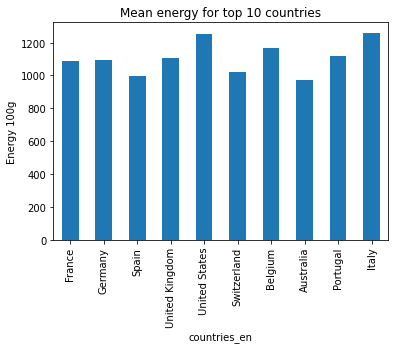

In [37]:
g = df.groupby("countries_en")["energy_100g"].mean()
g[top_countries].plot(kind="bar")
plt.title("Mean energy for top 10 countries")
plt.ylabel("Energy 100g")

Text(0, 0.5, 'Count')

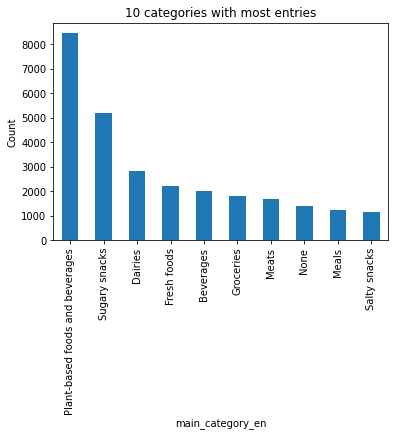

In [34]:
top_cat = df.groupby("main_category_en").size().sort_values(ascending=False).head(10).index
df.groupby("main_category_en").size().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("10 categories with most entries")
plt.ylabel("Count")

Text(0, 0.5, 'Energy 100g')

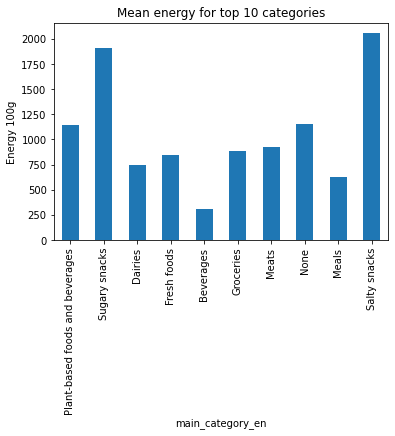

In [38]:
g = df.groupby("main_category_en")["energy_100g"].mean()
g[top_cat].plot(kind="bar")
plt.title("Mean energy for top 10 categories")
plt.ylabel("Energy 100g")

<br>

<font size="5"> **2. Clustering comparison **</font>

<br>

In [39]:
from sklearn.preprocessing import StandardScaler
cluster_data = StandardScaler().fit_transform(df[nutri_features].values)

In [40]:
cluster_data

array([[-0.36137393,  0.24283187,  0.95109412, ..., -0.22882275,
         1.71429646, -0.20463231],
       [-0.36137393,  0.24283187,  0.95109412, ..., -0.22884969,
         1.71429646, -0.20463231],
       [-0.77884709, -1.17697325, -0.64732129, ..., -0.27493426,
        -0.13188415, -0.65583356],
       ...,
       [-0.36733784, -0.55749188, -0.18385381, ..., -0.13876006,
         0.21427471, -0.59316672],
       [-0.61185783,  0.70327454,  1.70286027, ..., -0.10205572,
        -0.56046179, -0.58063335],
       [-0.76691929, -1.37705418, -1.00860696, ..., -0.27493426,
        -0.67584808, -0.63076682]])

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f78ec2b4940>
Traceback (most recent call last):
  File "/home/install/.local/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/install/.local/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/install/.local/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/install/.local/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_modul

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

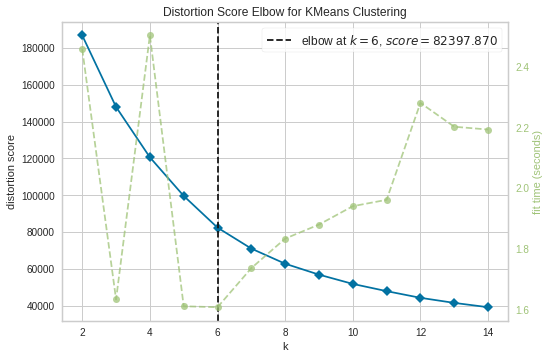

In [41]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(cluster_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [42]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=6)
labels = kmeans.fit_predict(cluster_data)
centroids  = kmeans.cluster_centers_
print(silhouette_score(cluster_data, labels))
print(np.unique(labels, return_counts=True))
df["label_kmean6"] = labels

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7942862ee0>
Traceback (most recent call last):
  File "/home/install/.local/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/install/.local/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/install/.local/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/install/.local/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_modul

0.413662829931127
(array([0, 1, 2, 3, 4, 5], dtype=int32), array([ 6535, 15770,  6097,  6486,  1734,   110]))


In [43]:
df.groupby("label_kmean6")[nutri_features].mean()

,fat_100g,energy_100g,carbohydrates_100g,proteins_100g,salt_100g,sugars_100g,saturated-fat_100g
label_kmean6,,,,,,,
0,18.296881,1828.822786,61.981718,5.114162,0.378045,46.109486,9.378549
1,4.076720,409.391643,11.333765,3.358282,0.691231,6.291774,1.418234
2,18.941863,1132.448043,5.079982,19.882852,1.793382,1.682471,7.963172
3,10.804742,1599.997777,61.587953,8.968271,1.082128,7.429802,2.737664
4,63.171984,2563.395542,9.969514,3.783014,0.667686,6.107178,24.147941
5,6.617091,680.218182,18.739091,6.077755,60.820276,5.406364,3.388118


In [44]:
import hdbscan
labels = hdbscan.HDBSCAN(min_cluster_size=500).fit_predict(cluster_data)
df["label_hdbscan"] = labels
print(silhouette_score(cluster_data, labels))
print(np.unique(labels, return_counts=True))
# HDBSCAN returns 5 clusters (1 is the outlier cluster)

0.09451785678539516
(array([-1,  0,  1,  2,  3]), array([19642,  2367,   964,  1533, 12226]))


In [45]:
df.groupby("label_hdbscan")[nutri_features].mean()

,fat_100g,energy_100g,carbohydrates_100g,proteins_100g,salt_100g,sugars_100g,saturated-fat_100g
label_hdbscan,,,,,,,
-1,19.700621,1451.696317,33.053347,9.334955,1.568537,15.712705,7.565067
0,24.627398,2078.909962,60.650885,6.592374,0.477862,36.901073,13.317362
1,3.461002,499.442666,0.935876,20.892220,1.718288,0.690066,1.193777
2,2.159236,1517.739472,71.929615,11.270587,0.160648,2.555547,0.445190
3,2.273599,324.405366,10.600342,2.995596,0.435886,5.694615,0.839115


In [46]:
from pyclustering.cluster.cure import cure
cure_instance = cure(cluster_data, 6)
cure_instance.process()
clusters = cure_instance.get_clusters()

In [47]:
labels = [-1 for i in range(len(df))]
for i,cluster in enumerate(clusters):
    print(len(cluster))
    for j in cluster:
        labels[j] = i
# clusters with CURE have a very bad distribution, almost all data in cluster 2, we don't bother to analyse it

92
2
36583
27
1
27


In [48]:
df["label_cure"] = labels

In [49]:
df

,creator,countries_en,brands,main_category_en,packaging,fat_100g,energy_100g,carbohydrates_100g,proteins_100g,salt_100g,sugars_100g,saturated-fat_100g,has_image,label_kmean6,label_hdbscan,label_cure
10,tacinte,United Kingdom,"Asda,Asda Extra Special",Desserts,"plastic,bowl",7.0,1284.0,54.2,3.9,0.200000,44.0,3.6,False,0,-1,2
11,tacinte,United Kingdom,"Asda,Asda Extra Special",Sugary snacks,"plastic,bowl",7.0,1284.0,54.2,3.9,0.199898,44.0,3.6,False,0,-1,2
13,andre,France,Pepsi,Beverages,Canette aluminium,0.0,177.0,10.4,0.0,0.025400,10.4,0.0,False,1,3,2
16,tacite,France,"7Up,Pepsico",Beverages,Canette,0.0,177.0,10.4,0.0,0.100000,10.4,0.0,False,1,3,2
24,malikele,Germany,Candy Crush,Sugary snacks,None,0.0,1360.0,75.0,5.0,0.127000,57.5,0.0,False,0,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78207,kyzh,United Kingdom,princes,Tuna-chunks,canned,0.5,444.0,0.0,25.0,0.762000,0.0,0.0,False,2,-1,2
78209,tacinte,United Kingdom,Newman's Own,Groceries,"Glass,Bottle",53.3,2111.0,6.4,1.7,1.750060,5.3,3.8,False,4,-1,2
78210,tacinte,United Kingdom,Newman's Own,Groceries,"Glass,Bottle",6.9,660.0,23.1,0.3,0.541020,16.7,0.5,False,1,-1,2
78235,drmalabar,France,Le Pain des fleurs,Plant-based foods and beverages,"Boîte,Carton,Sachet,Plastique",2.8,1643.0,74.8,13.0,0.680000,2.6,0.6,False,3,2,2


Text(0.5, 1.0, 'Comparison of nutrients per cluster (k-means)')

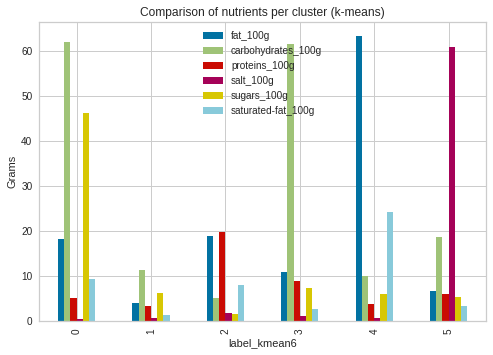

In [50]:
nutri_features_no_energy = ["fat_100g", "carbohydrates_100g", "proteins_100g", "salt_100g", "sugars_100g", "saturated-fat_100g"]
df.groupby("label_kmean6")[nutri_features_no_energy].mean().plot(kind="bar")
plt.ylabel("Grams")
plt.title("Comparison of nutrients per cluster (k-means)")

Text(0.5, 1.0, 'Comparison of nutrients per cluster (hdbscan)')

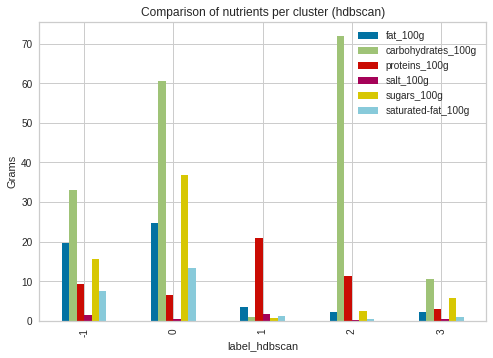

In [51]:
nutri_features_no_energy = ["fat_100g", "carbohydrates_100g", "proteins_100g", "salt_100g", "sugars_100g", "saturated-fat_100g"]
df.groupby("label_hdbscan")[nutri_features_no_energy].mean().plot(kind="bar")
plt.ylabel("Grams")
plt.title("Comparison of nutrients per cluster (hdbscan)")

Text(0.5, 1.0, 'Comparison of energy per cluster (k-means)')

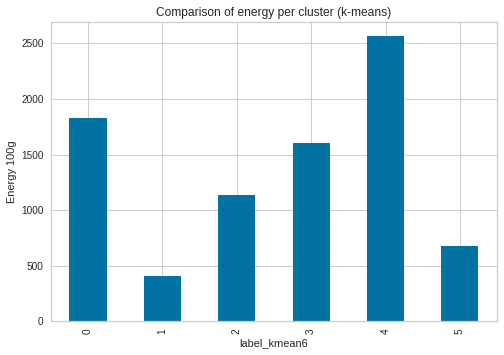

In [54]:
df.groupby("label_kmean6")["energy_100g"].mean().plot(kind="bar")
plt.ylabel("Energy 100g")
plt.title("Comparison of energy per cluster (k-means)")

Text(0.5, 1.0, 'Comparison of energy per cluster (HDBSCAN)')

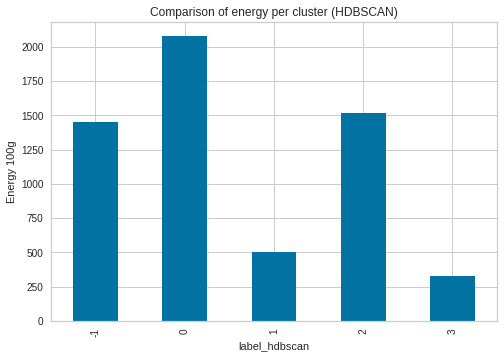

In [55]:
df.groupby("label_hdbscan")["energy_100g"].mean().plot(kind="bar")
plt.ylabel("Energy 100g")
plt.title("Comparison of energy per cluster (HDBSCAN)")

In [71]:
# We continue with some more in depth analysis on k-means since it has a significantly higher silhouette score

Text(0.5, 1.0, 'Top 10 countries distribution per cluster (normalized)')

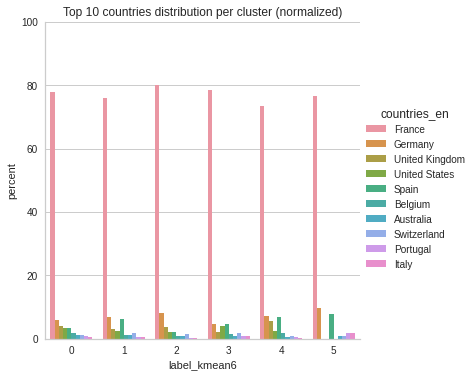

In [69]:
x,y = 'label_kmean6', 'countries_en'

df1 = df[df["countries_en"].isin(top_countries)]
df1 = df1.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

plt.title("Top 10 countries distribution per cluster (normalized)")


Text(0.5, 1.0, 'Top 10 categories distribution per cluster (normalized)')

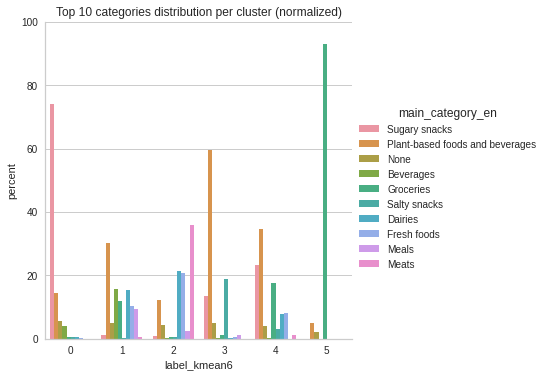

In [70]:
x,y = 'label_kmean6', 'main_category_en'

df1 = df[df["main_category_en"].isin(top_cat)]
df1 = df1.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

plt.title("Top 10 categories distribution per cluster (normalized)")

Text(0.5, 1.0, '"Has image" per cluster')

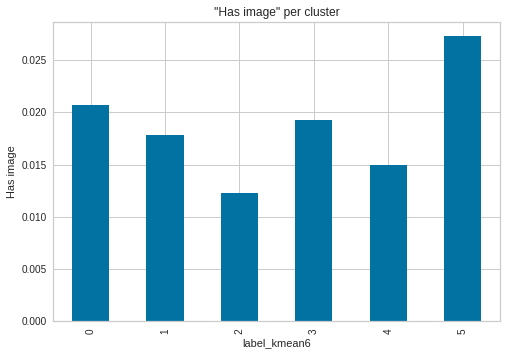

In [74]:
df.groupby("label_kmean6")["has_image"].mean().plot(kind="bar")
plt.ylabel("Has image")
plt.title('"Has image" per cluster')